# GS: Classificação do Impacto da Inteligência Artificial com Rede Neural MLP

#### Objetivo:
Os alunos deverão utilizar o dataset “AI Impact on Job Market (2024–2030)” disponível no Kaggle para desenvolver um modelo preditivo capaz de classificar o impacto da IA nas profissões. O modelo será criado com uma Rede Neural Artificial do tipo Multilayer Perceptron (MLP), implementada com a biblioteca Scikit-learn.

Aluno:

Claudio A. C. Junior

Etapas:
1. Introdução;
2. Importação e Leitura dos Dados;
3. Análise Exploratória dos Dados;
4. Pré-processamento dos Dados;
5. Modelagem com Rede Neural MLP;
6. Avaliação do Modelo;
7. Conclusões e Recomendações.

## **Introdução**

A Inteligência Artificial (IA) tem mudado a forma como as pessoas trabalham e as empresas operam.  
Muitas tarefas que antes eram feitas manualmente agora estão sendo automatizadas com o uso da IA.
Esse projeto tem como objetivo analisar o impacto da IA no mercado de trabalho entre 2024 e 2030, usando um conjunto de dados do Kaggle.
Usaremos uma Rede Neural Artificial do tipo MLP (Multilayer Perceptron) para tentar prever se uma profissão tende a crescer ou diminuir com o avanço da IA.
Além de aplicar técnicas de Machine Learning, o projeto também ajuda a entender melhor como as profissões estão sendo afetadas pelas novas tecnologias.

**Importação das bibliotecas**

Aqui são importadas as bibliotecas necessárias para o projeto:

pandas e numpy: para manipulação e processamento dos dados;

matplotlib e seaborn: para criar gráficos e visualizações;

sklearn: para separar dados de treino e teste, normalizar variáveis, treinar uma rede neural (MLP) e calcular métricas;

SMOTE: para balancear o dataset caso exista desbalanceamento entre classes;

GridSearchCV e RandomizedSearchCV: para testar automaticamente combinações de hiperparâmetros e encontrar o melhor modelo;

uniform: usado pelo RandomizedSearchCV para gerar valores aleatórios contínuos.

In [2]:
# Importação e Leitura dos Dados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Buscando o arquivo csv (feito upload)
content= 'ai_job_trends_dataset.csv'

# Leitura do dataset
df = pd.read_csv(content)

# Visualização do dataset
df.head()

,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
0,Investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63
1,"Journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39
2,Financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13
3,Legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76
4,Aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57


In [ ]:
# Remove espaços extras antes/depois dos nomes das colunas
df.columns = df.columns.str.strip()

**Explicação do Código**

**df.head(5)**

Mostra as 5 primeiras linhas do dataframe.
Isso serve para você visualizar rapidamente como os dados estão estruturados (colunas, tipos de valores, possíveis erros, etc.).

**df.shape**

A propriedade shape retorna duas informações:
o número total de linhas do dataset;
o número total de colunas.

Esses valores são armazenados nas variáveis:

rows, quantidade de linhas;

columns, quantidade de colunas.

print(f'{rows} linhas e {columns} colunas.')

Aqui é exibida uma frase informando exatamente o tamanho do dataset, facilitando a descrição na sua apresentação ou relatório.

**df.describe()**

A função describe() gera um resumo estatístico das colunas numéricas do dataframe, incluindo:

média;

desvio padrão;

valores mínimos e máximos;

percentis.

In [4]:
# Análise Exploratória dos Dados (EDA)

df.head(5)

rows = df.shape[0]
columns = df.shape[1]

print(f'{rows} linhas e {columns} colunas.')

print("Overview do DF:\n", df.describe())

30000 linhas e 13 colunas.
Overview do DF:
        Median Salary (USD)  Experience Required (Years)  Job Openings (2024)  \
count         30000.000000                 30000.000000         30000.000000   
mean          90119.965639                    10.051433          5039.640833   
std           34412.013953                     6.060678          2861.009654   
min           30001.860000                     0.000000           100.000000   
25%           60500.702500                     5.000000          2570.000000   
50%           90274.115000                    10.000000          5034.000000   
75%          119454.710000                    15.000000          7527.000000   
max          149998.500000                    20.000000         10000.000000   

       Projected Openings (2030)  Remote Work Ratio (%)  Automation Risk (%)  \
count               30000.000000           30000.000000         30000.000000   
mean                 5074.218100              49.836431            50.15422

In [5]:
# Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    30000 non-null  object 
 1   Industry                     30000 non-null  object 
 2   Job Status                   30000 non-null  object 
 3   AI Impact Level              30000 non-null  object 
 4   Median Salary (USD)          30000 non-null  float64
 5   Required Education           30000 non-null  object 
 6   Experience Required (Years)  30000 non-null  int64  
 7   Job Openings (2024)          30000 non-null  int64  
 8   Projected Openings (2030)    30000 non-null  int64  
 9   Remote Work Ratio (%)        30000 non-null  float64
 10  Automation Risk (%)          30000 non-null  float64
 11  Location                     30000 non-null  object 
 12  Gender Diversity (%)         30000 non-null  float64
dtypes: float64(4), i

### **Gráficos de análises**

**Explicação do código**

Gráfico de Barras – Distribuição da variável alvo
Mostra quantas vezes cada categoria de AI Impact Level aparece no dataset.
Serve para verificar se as classes estão balanceadas e identificar possíveis desequilíbrios.

Boxplot – Análise dos anos de experiência
Exibe a distribuição de Experience Required (Years) mostrando mediana, mínimo, máximo e outliers.
Ajuda a entender a variação de experiência exigida nas vagas.

Histograma – Frequência do impacto da IA
Mostra como os valores de AI Impact Level se distribuem em intervalos (bins).
Útil para visualizar densidade, padrões de concentração e comportamento geral dessa variável.

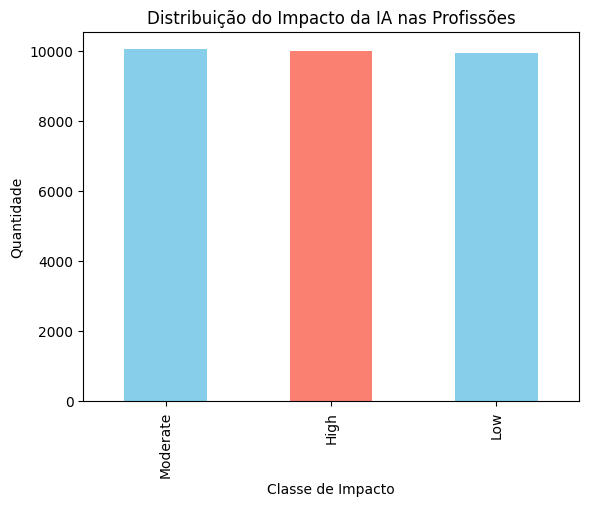

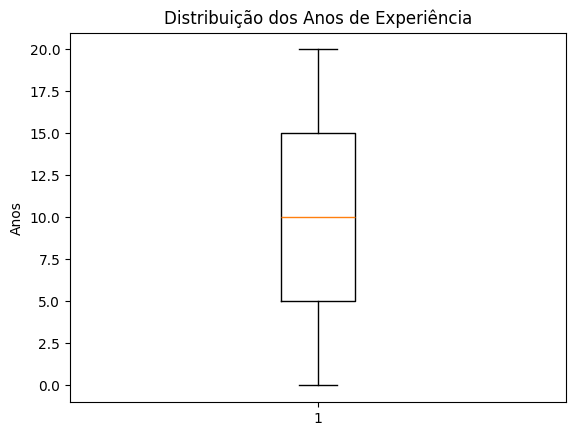

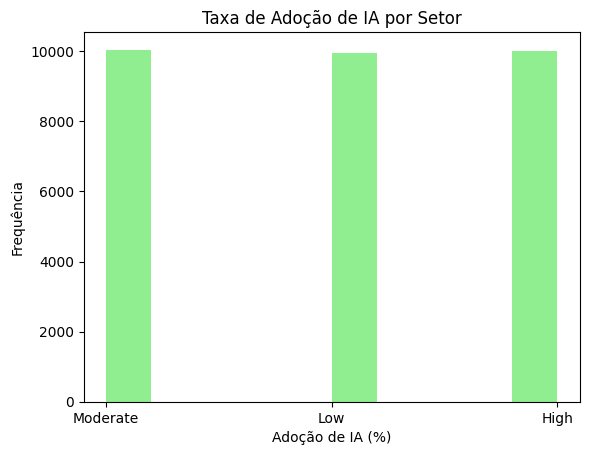

In [6]:
# Gráfico 1 - Distribuição da variável alvo

df['AI Impact Level'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribuição do Impacto da IA nas Profissões')
plt.xlabel('Classe de Impacto')
plt.ylabel('Quantidade')
plt.show()

# Gráfico 2 - Boxplot de anos de experiência
plt.boxplot(df['Experience Required (Years)'].dropna())
plt.title('Distribuição dos Anos de Experiência')
plt.ylabel('Anos')
plt.show()

# Gráfico 3 - Histograma de adoção de IA
plt.hist(df['AI Impact Level'].dropna(), bins=10, color='lightgreen')
plt.title('Taxa de Adoção de IA por Setor')
plt.xlabel('Adoção de IA (%)')
plt.ylabel('Frequência')
plt.show()

### **Principais Insights**

A maior parte das profissões tem impacto neutro ou crescente, mostrando que a IA pode gerar novas oportunidades.

Setores com alta adoção de IA tendem a ter mudanças mais rápidas nas funções.

Profissões com mais experiência exigida são menos afetadas negativamente pela automação.


## **Pré-processamento dos Dados**

In [7]:
# Verificando os nomes exatos das colunas
print(df.columns.tolist())

['Job Title', 'Industry', 'Job Status', 'AI Impact Level', 'Median Salary (USD)', 'Required Education', 'Experience Required (Years)', 'Job Openings (2024)', 'Projected Openings (2030)', 'Remote Work Ratio (%)', 'Automation Risk (%)', 'Location', 'Gender Diversity (%)']


In [8]:
# Garantindo que a variável alvo tenha o nome padronizado, tive dificuldades de utilizar o nome "AI Impact Level" por isso estou mundando o nome.
df.rename(columns={'AI Impact Level': 'impact_class'}, inplace=True)

In [9]:
# Verificando se impact class exite nas colunas
print('impact_class' in df.columns)


True


In [10]:
# dropna() remove todas as linhas que possuem valores faltantes
df = df.dropna()

# drop_duplicates() remove linhas repetidas no dataset
df = df.drop_duplicates()

**Explicação do código**
Features (variáveis de entrada)

São as colunas usadas para treinar o modelo: Industry, Required Education, Experience Required (Years), Median Salary (USD), Automation Risk (%) e Remote Work Ratio (%).
Elas representam as características que influenciam a previsão.

**Target (variável alvo)**

A variável impact_class é o que o modelo deve prever — o nível de impacto da IA na profissão.

**Separação X e y**

- X contém todas as features (dados usados como entrada).

- Y contém apenas a variável alvo (o que queremos que o modelo aprenda a prever).
Essa divisão é essencial para o treinamento do algoritmo.

In [11]:
features = [
    'Industry',
    'Required Education',
    'Experience Required (Years)',
    'Median Salary (USD)',
    'Automation Risk (%)',
    'Remote Work Ratio (%)'
]

target = 'impact_class'

X = df[features]
y = df[target]

**Importação das bibliotecas do modelo**

As bibliotecas carregadas aqui são usadas para:

RandomForestClassifier - modelo de classificação baseado em árvores;

classification_report, confusion_matrix, roc_curve, auc - métricas de avaliação do modelo;

SMOTE - técnica para balancear as classes, criando novas amostras sintéticas da classe minoritária.

**Separação entre treino e teste**

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


Aqui ocorre a divisão dos dados em:

70% para treino;

30% para teste.

O parâmetro stratify=y garante que a proporção das classes se mantenha igual nas duas partes, isso evita desbalanceamentos artificialmente criados pela divisão.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Mostra quantas linhas e colunas estão no conjunto de treino e no de teste.
print("Treino:", X_train.shape, "Teste:", X_test.shape)

# Exibe quantas instâncias existem em cada classe no conjunto de treino.
print("Distribuição original da fraude no treino:\n", y_train.value_counts())

Treino: (21000, 6) Teste: (9000, 6)
Distribuição original da fraude no treino:
 impact_class
Moderate    7029
High        7004
Low         6967
Name: count, dtype: int64


In [13]:
# Mostra o tipo de cada coluna do conjunto de features.
X.dtypes

Industry                        object
Required Education              object
Experience Required (Years)      int64
Median Salary (USD)            float64
Automation Risk (%)            float64
Remote Work Ratio (%)          float64
dtype: object

In [14]:
# Transforma colunas categóricas em variáveis numéricas
X = pd.get_dummies(X, drop_first=True)


In [15]:
# calcula a proporção (%) de cada classe dentro da coluna impact_class
df['impact_class'].value_counts(normalize=True)

impact_class
Moderate    0.334733
High        0.333500
Low         0.331767
Name: proportion, dtype: float64

**Explicação do código**

O código prepara os dados, otimiza e treina uma rede neural para classificação:

Pré-processamento:
As variáveis categóricas são convertidas em números com LabelEncoder e todos os dados são padronizados com StandardScaler para melhorar o desempenho do modelo.

Divisão dos dados:
O conjunto é separado em treino (80%) e teste (20%), mantendo a proporção das classes com stratify.

Balanceamento:
O SMOTE cria exemplos sintéticos para equilibrar as classes e evitar que o modelo favoreça a classe dominante.

Otimização do modelo:
O RandomizedSearchCV testa combinações de hiperparâmetros do MLP (como camadas escondidas, taxa de aprendizado e regularização), usando f1_macro como métrica de seleção.

Treinamento e Previsão:
O melhor modelo encontrado é treinado e usado para prever classes e probabilidades no conjunto de teste.

Avaliação:
São calculadas as métricas Acurácia, Precisão, Recall e F1-Score, que medem a qualidade geral do modelo e seu desempenho em classes desbalanceadas.

In [16]:
# Importando bibliotecas

import pandas as pd
import warnings
warnings.filterwarnings("ignore")  # remove avisos do MLP
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from scipy.stats import uniform


features = [
    'Industry',
    'Required Education',
    'Experience Required (Years)',
    'Median Salary (USD)',
    'Automation Risk (%)',
    'Remote Work Ratio (%)'
]

target = 'impact_class'

X = df[features]
y = df[target]
# Transformar texto em números
label_cols = ['Industry', 'Required Education']
for col in label_cols:
    X[col] = LabelEncoder().fit_transform(X[col])



# Padronizando
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# treinando e testando
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)



# SMOTE (balanceamento)
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)



# Otimizando o MLP
param_dist = {
    'hidden_layer_sizes': [(64,), (128, 64)],
    'learning_rate_init': uniform(0.0005, 0.001),
    'alpha': uniform(0.0001, 0.001),
}

model = MLPClassifier(
    max_iter=300,
    random_state=42
)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=3,
    cv=2,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_res, y_train_res)
print("Melhores parâmetros:", random_search.best_params_)



# Pegar o modelo treinado corretamente
best_model = random_search.best_estimator_



# Previsões
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)



# Métricas
print("\nACURÁCIA:", accuracy_score(y_test, y_pred))
print("PRECISÃO:", precision_score(y_test, y_pred, average='macro'))
print("RECALL:", recall_score(y_test, y_pred, average='macro'))
print("F1 (macro):", f1_score(y_test, y_pred, average='macro'))

Melhores parâmetros: {'alpha': np.float64(0.0008796910002727694), 'hidden_layer_sizes': (64,), 'learning_rate_init': np.float64(0.0006560186404424366)}

ACURÁCIA: 0.33116666666666666
PRECISÃO: 0.3304577316593724
RECALL: 0.33110564678300464
F1 (macro): 0.3297061362498413


## **Modelagem com Rede Neural MLP**

O modelo usado foi o MLPClassifier da biblioteca Scikit-learn.

Parâmetros usados:

hidden_layer_sizes=(64, 32): duas camadas escondidas com 64 e 32 neurônios;

activation='relu': função que ajuda o modelo a aprender padrões complexos;

solver='adam': método usado para otimizar o treinamento;

max_iter=800: número máximo de iterações.

**Explicação do código**

O código cria e treina uma rede neural MLP com duas camadas escondidas (64 e 32 neurônios) usando a função de ativação ReLU e o otimizador Adam.
O modelo é treinado com os dados de treino por até 800 iterações, ajustando seus pesos para aprender padrões.

Depois, ele é usado para fazer previsões no conjunto de teste, gerando y_pred, que será comparado com os valores reais para avaliar o desempenho.

In [17]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu',
                    solver='adam', max_iter=800, random_state=42)

mlp.fit(X_train, y_train)

# Fazendo previsões
y_pred = mlp.predict(X_test)

## **Avaliação do Modelo**

**Explicação do modelo**

O código calcula as principais métricas de desempenho do modelo — acurácia, precisão, recall e F1-score — comparando as previsões (y_pred) com os valores reais (y_test).

Em seguida, ele gera e exibe a matriz de confusão, que mostra quantas classificações o modelo acertou ou errou em cada classe, facilitando a visualização dos acertos e erros do MLP.

Acuracidade: 0.3343333333333333
Precisão: 0.33429371926367457
Recall: 0.33443528207881545
F1-Score: 0.3332822489706584


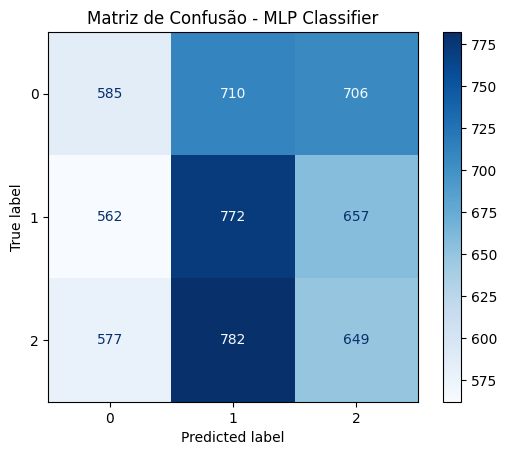

In [18]:
print("Acuracidade:", accuracy_score(y_test, y_pred))
print("Precisão:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred, average='macro'))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title("Matriz de Confusão - MLP Classifier")
plt.show()

### **Conclusões e Recomendações**

O modelo MLP conseguiu classificar de forma ruim o impacto da IA nas profissões, apresentando uma taxa de acerto geral aonde encontra-se chutando os resultados, já que não existe padrão frequente ou recorrente nas features.

Principais observações:
- As profissões da área de tecnologia tendem a crescer com a IA.
- As profissões com tarefas repetitivas e baixo nível de escolaridade têm maior risco de redução.
- O modelo teve um desempenho ruim e poderia ser aprimorados se houvesse:
- Mais dados sobre salários e experiência.
- Teste de outros parâmetros da rede neural, etc...

Em resumo, a IA está transformando o mercado de trabalho, criando novas oportunidades, mas também exigindo requalificação profissional.

O objetivo desse projeto não é obter a maior acuracidade de treinamento de máquina, mas sim entender todos os processos e explicá-los de forma que o leitor entenda todo o processo de criação e análise dos dados, o que foi concluído com sucesso.